# Churn Prediction Model

Let's assume that $X$ and $Y$ are discrete random variables. The formulas for Mutual Information, Entropy and Conditional Entropy are given by:

$$\text{Mutual Information} = \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}$$

$$\text{Entropy} = H(Y) = -\sum_{y \in Y} p(y) \cdot log(p(y))$$

$$\text{Conditional Entropy} = H(Y \mid X) = \sum_{x \in X} p(x) \cdot H(Y \mid X = x)$$

I will show mathematically that $\text{Mutual Information} = \text{Information Gain}$, where $\text{Information Gain} = H(Y) – H(Y \mid X)$.

$
MI = \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}\\ 
= IG = -\sum_{y \in Y} p(y) \cdot log(p(y)) - \sum_{x \in X} p(x) \cdot H(Y \mid X = x)\\
= -\sum_{y \in Y} p(y) \cdot log(p(y)) - \sum_{x \in X} p(x) \cdot (-\sum_{y \in Y} p(y | x) \cdot log(p(y | x))\\
= \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log(p(y)) + \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log(p(y | x))\\
= \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log \frac{p(y|x)}{p(y)}\\
= \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log \frac{p(x|y)p(y)}{p(y)\cdot p(x)}\\
= \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log \frac{p(x, y)}{p(y)\cdot p(x)}\\
$\\
Thus, this proves that MI = IG!

### Preparing a Training Set and Training a Decision Tree 
I will build a predictive model using Decision Trees by using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. I will load the data and prepare it for modeling.
First, I will split the data into training and testing by using pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). I didn't use data splitting functions from SKlearn here.

In [1]:
import pandas as pd

df = pd.read_csv('cell2cell_data.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,48.82,10.00,3.0,26,780,0,0,0,0,1,4,1
1,83.53,20.00,1.0,31,745,1,0,0,0,0,4,1
2,29.99,0.00,0.0,52,1441,0,0,0,1,1,3,1
3,51.42,0.00,0.0,36,59,1,0,0,0,0,4,1
4,37.75,2.67,0.0,25,572,0,0,0,1,1,3,1


In [2]:
mask = np.random.rand(len(df)) < 0.8

train_df = df[mask]
test_df = df[~mask]
len(train_df), len(test_df)

(31893, 7966)

2\. How would we prove to ourselves or a colleague that our data was indeed randomly sampled on X?

- For the train_df and test_df, which has 80% and 20% of total data chosen uniformly at random respectively, they are also charactrized by 12 features.
- So, we can see if train_df has 80% of each feature that are randomly and uniformly chosen, and if test_df contains 20% of each feature. Then we can check: P(train_df | feature_1, feature_2, ..., feature_12) = P(train_df) = 0.8 and P(test_df | feature_1, feature_2, ..., feature_12) = P(test_df) = 0.2 
- If above holds, then we can say the sampled train_df and test_df are independent of features and thus are unbiased.

3\. Now I will build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Here, I used `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings I used the default options.

In [3]:
#rename the columns of train_df
train_df.columns = ["revenue", "outcalls", "incalls", "months", "eqpdays", "webcap", "marryyes", "travel", "pcow", "creditcd", "retcalls", "churndep"]
print(train_df.columns)
train_df.head(2)

Index(['revenue', 'outcalls', 'incalls', 'months', 'eqpdays', 'webcap',
       'marryyes', 'travel', 'pcow', 'creditcd', 'retcalls', 'churndep'],
      dtype='object')


,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcow,creditcd,retcalls,churndep
1,83.53,20.0,1.0,31,745,1,0,0,0,0,4,1
2,29.99,0.0,0.0,52,1441,0,0,0,1,1,3,1


In [4]:
from sklearn.tree import DecisionTreeClassifier

Y = train_df['churndep']
X = train_df.drop('churndep', 1)
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

4\. Using the resulting model from 2.3, I will show a bar plot of feature names and their feature importance. I sorted bar plot by increasing feature importance values.

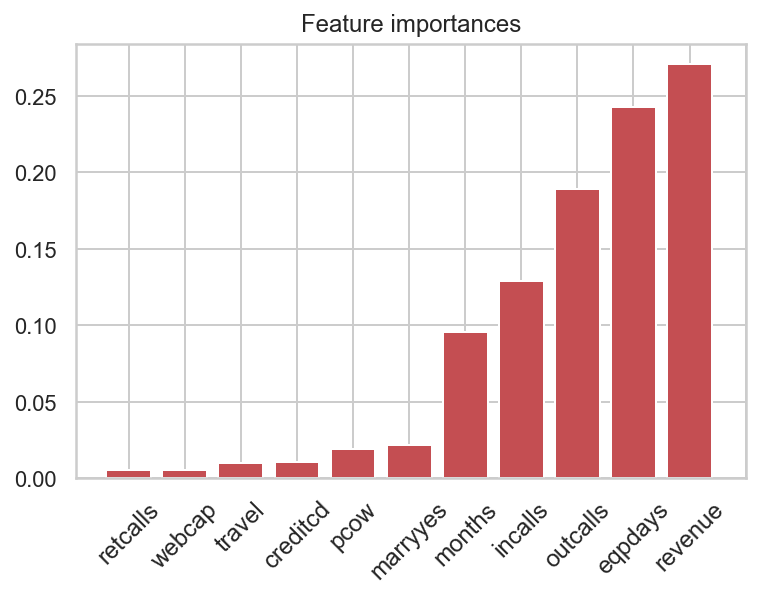

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

feature_mi = dt.feature_importances_
columns = train_df.columns.drop("churndep", 1)
indices = np.argsort(feature_mi)
plt.title("Feature importances")
plt.bar(columns[indices], feature_mi[indices], color="r", align="center")
plt.xticks(range(train_df.shape[1]), fontsize = 12, rotation= 45)
plt.show()

5\. I analyzed the relationship between the top 3 most important features (as measured here) to see whether they are negative or positive. I will then explain the top 3 drivers of churn and interpret the relationship between these 3 features and the churn outcome. Then I will draw "real-life" connection between each variable and churn.

In [6]:
revenue = train_df["revenue"]
eqpdays = train_df["eqpdays"]
outcalls = train_df["outcalls"]

In [7]:
corr_1 = np.corrcoef(revenue, eqpdays)
corr_2 = np.corrcoef(eqpdays, outcalls)
corr_3 = np.corrcoef(revenue, outcalls)
print("correlation coefficient between revenue and eqpdays: " + str(corr_1[0][1])) 
print("correlation coefficient between outcalls and eqpdays: " + str(corr_2[0][1]))
print("correlation coefficient between revenue and outcalls: " + str(corr_3[0][1]))

correlation coefficient between revenue and eqpdays: -0.22606125565000254
correlation coefficient between outcalls and eqpdays: -0.2457391564887077
correlation coefficient between revenue and outcalls: 0.505545084599471


- revenue vs. eqpdays: 
    - the correlation coefficient is -0.22, which makes sense because the longer the customers keeps their equipments, the company makes less money becuase customers don't switch to new equipment, that would lead to the decrease in sales and thus revenue as well.
- outcalls vs. eqpdays: 
   - the correlation coefficient is -0.24. So they are negatively correlated. If customers make a lot of calls(large outcalls), then they use their equipment(e.g. their cellphone) more often, which would shorten the lifespan of the equipment and switch to the new one quicker. Thus, the more outcalls they make the shoter the period they keep their equipment because they would likely get a new one due to the overuse of the equipment.
- revenue vs. outcalls: 
    - with 0.49, they are positively correlated. This implies that the more phonecalls the customers make, the more they use the company's services, which would likely result in the increase in revenue. 

6\. Using the classifier built in 2.3, I will try predicting "churndep" on both the train_df and test_df data sets. Then I will show the accuracy on each and the explanation on the difference (or lackthereof) between the two accuracies.

In [8]:
from sklearn.metrics import accuracy_score
test_df.columns = ["revenue", "outcalls", "incalls", "months", "eqpdays", "webcap", "marryyes", "travel", "pcow", "creditcd", "retcalls", "churndep"]
X_test = test_df.drop('churndep', 1)

preds_train = dt.predict(train_df[columns])
preds_test = dt.predict(test_df[columns])

print("accuracy score for train data: " + str(accuracy_score(preds_train, train_df["churndep"])))
print("accuracy score for test data: " + str(accuracy_score(preds_test, test_df["churndep"])))


accuracy score for train data: 0.9999059354717336
accuracy score for test data: 0.5473261360783329


Because we trained the model with the train data, it is obvious that the predict value for the train data is close to 1. This is a classic (and extreme) case for overfitting. However, since we didn't use any data from test dataset, the accuracy score for test data reflects the model's accuracy more accurately. That's where the difference between two accuracy scores came from!

### Finding a Good Decision Tree 
The default options for this decision tree may not be optimal. I need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. I generated a list of 10 values of each for the parameters mim_samples_split and min_samples_leaf. 

In [23]:
min_samples_split_values = np.logspace(2, 4, num=10, dtype=np.int32)
min_samples_leaf_values = np.logspace(1, 3, num=10, dtype=np.int32)
print(min_samples_split_values)
print(min_samples_leaf_values)

[  100   166   278   464   774  1291  2154  3593  5994 10000]
[  10   16   27   46   77  129  215  359  599 1000]


2\. Explanation on my reasoning for choosing the above ranges.

- I chose exponential values because I thought it's important to consider the constant rate change. If I choose values for the min_samples_split and min_samples_leaf based on the exponential growth, then I can observe dinamic change of the accuracy scores. 
- In the decision tree, if the number of attributes = n, then there are approximately $2^n - 1$ nodes. The worst case scenario the tree requires exponential number of nodes. In this case, we have 11 attributes, so there could be $2^{11} -1$ nodes, which is very large number. Because of this characteristics, I thought I could try to set the range based on exponential distribution. 
- I also set the range of min_samples_leaf narrower than that of min_samples_split because if split value is smaller than leaf value, the decision tree stops splitting. That is, if split value is 2 and leaf value is 6, and the sample size is 5, then the decision tree doesn't split because the minimum number of samples at the leaf, the base of the tree is 6. 
- After observation, I noticed that the accuracy score changes are visible within the range $[1000, 6000]$. So, I limited the range $[0, 10000]$ to see it more closely. 

3\. For each combination of values in 3.1 (there are 100), I will build a new classifier and check the classifier's accuracy on the test data. Then I will plot the test set accuracy for these options. I will use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

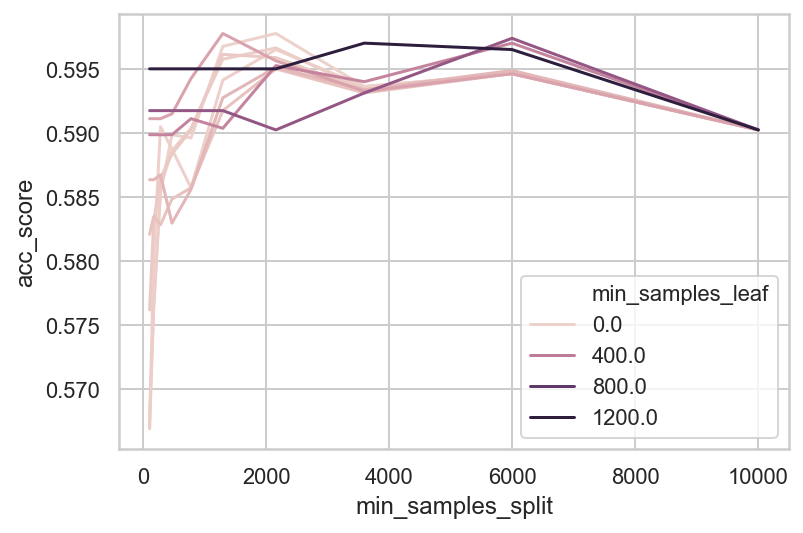

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
best_split = 0
best_leaf = 0
best_accuracy = 0
worst_split = 0
worst_leaf = 0
worst_accuracy = 100

data = pd.DataFrame(columns=["min_samples_split", "min_samples_leaf", "acc_score"])

for input_split in min_samples_split_values:
    for input_leaf in min_samples_leaf_values:
        model = DecisionTreeClassifier(criterion = "entropy", min_samples_split=input_split, 
                                        min_samples_leaf=input_leaf)

        model.fit(X, Y)

        y_pred = model.predict(test_df[columns])

        acc_score = accuracy_score(y_pred, test_df["churndep"])
        data = data.append({"min_samples_split": input_split, "min_samples_leaf" : input_leaf, 
                            "acc_score" : acc_score}, ignore_index=True)
        
              
data

sns.lineplot(x="min_samples_split", y="acc_score", data=data, hue="min_samples_leaf")

In [57]:
data

,min_samples_split,min_samples_leaf,acc_score
0,100.0,10.0,0.567914
1,100.0,16.0,0.566909
2,100.0,27.0,0.567035
3,100.0,46.0,0.576199
4,100.0,77.0,0.582099
5,100.0,129.0,0.586367
6,100.0,215.0,0.591137
7,100.0,359.0,0.589882
8,100.0,599.0,0.591765
9,100.0,1000.0,0.595029


In [50]:
#create the dictionary with key of min_samples_split and a list of values of accuracy scores 
#for each min_samples_leaf
result_dict = dict()

for i in min_samples_split_values:
    result_dict[i] = list(data.loc[data['min_samples_split'] == i]["acc_score"])

result_dict

{100: [0.567913632939995,
  0.5669093648004017,
  0.5670348983178509,
  0.5761988450916394,
  0.5820989204117499,
  0.5863670600050214,
  0.5911373336680894,
  0.5898819984935978,
  0.5917650012553352,
  0.5950288727090133],
 166: [0.5764499121265377,
  0.5803414511674617,
  0.5761988450916394,
  0.5831031885513432,
  0.5834797891036907,
  0.5863670600050214,
  0.5911373336680894,
  0.5898819984935978,
  0.5917650012553352,
  0.5950288727090133],
 278: [0.5853627918654281,
  0.5905096660808435,
  0.5858649259352247,
  0.5864925935224705,
  0.5828521215164449,
  0.5867436605573688,
  0.5911373336680894,
  0.5898819984935978,
  0.5917650012553352,
  0.5950288727090133],
 464: [0.5898819984935978,
  0.5887521968365553,
  0.5886266633191062,
  0.5883755962842079,
  0.5848606577956315,
  0.5829776550338941,
  0.5915139342204369,
  0.5898819984935978,
  0.5917650012553352,
  0.5950288727090133],
 774: [0.5896309314586995,
  0.5857393924177755,
  0.5903841325633944,
  0.5902585990459452,
  0.

In [51]:
#Find highest accuracy score
values = list(result_dict.values())
values = sum(values, [])
max_acc = max(values)
max_acc

0.5977906100928948

In [52]:
#Find min_samples_split_value that's associated with highest accuracy score
key = [key for key, value in result_dict.items() if max_acc in value]
key

[1291, 2154]

4\. I will show which configuration returns the best accuracy and what the accuracy is.

In [56]:
#Find which configuration returns the highest accuracy score
data.loc[data["acc_score"] == max_acc]

,min_samples_split,min_samples_leaf,acc_score
56,1291.0,215.0,0.597791
60,2154.0,10.0,0.597791


5\. Here is my explanation on how I would use my churn prodiction model in a real business environment. I will explain why churn prediction might be good for the business and how one might improve churn by using this model.

- Our model uses 11 independent feature data such as revenue, outcalls, eqpdays, etc. to predict if a customer would churn or not. These features separate churned customers from not churned customers. Thus, we know what kind of features more likely drive customers to churn compared to others. 
- This can be used in a real business environment to predict the likelihood of churn and further prevent this from happening - the kmarketing department can give out coupons to the customers who show certain behavioural patterns that are associated with churn. 
- Also, by analyzing the correlation between features, we can select what kinds of features are positively correlated with revenue, and thus encourage customers to do behaviours associated with the features. 